First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Decision Tree Results:
Mean Squared Error (MSE): 0.50
R² Score: 0.62



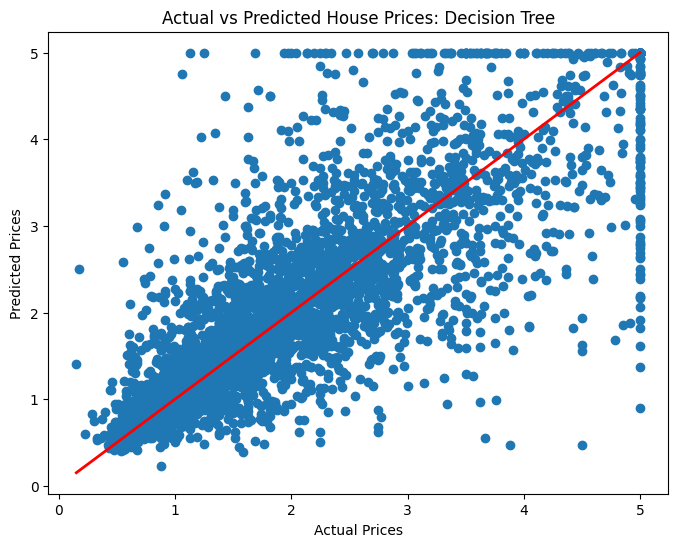

SVM Results:
Mean Squared Error (MSE): 0.36
R² Score: 0.73



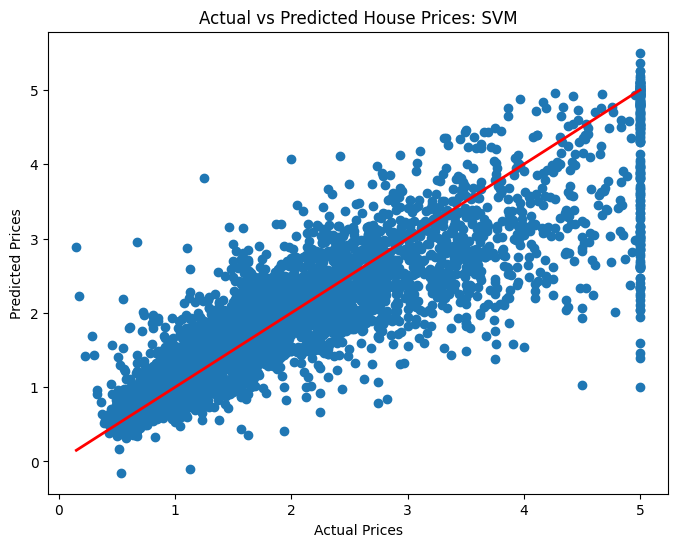

Random Forest Results:
Mean Squared Error (MSE): 0.26
R² Score: 0.81



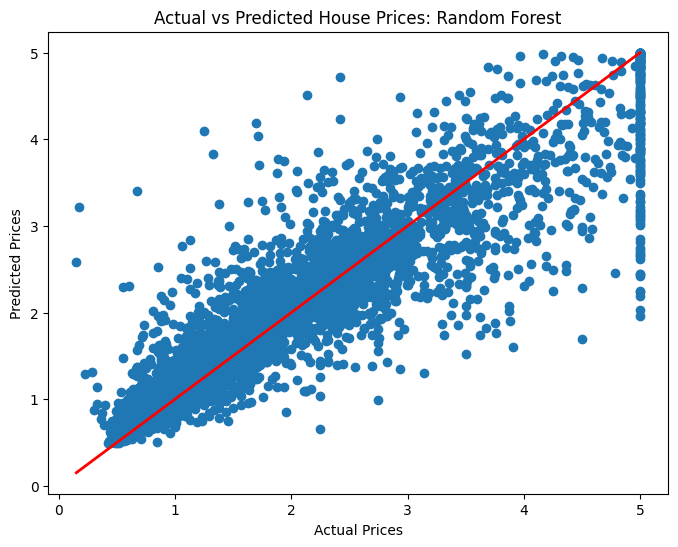

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Results:
Mean Squared Error (MSE): 0.28
R² Score: 0.79



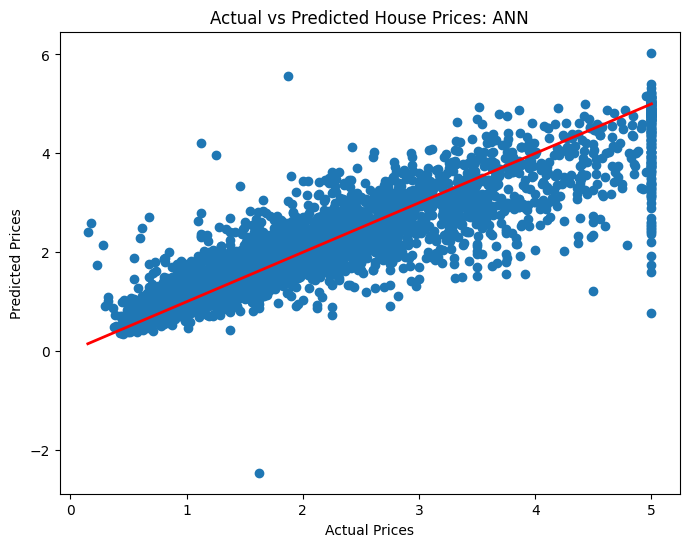

Best Model: Random Forest with MSE = 0.26

Predicted House Price (in $100,000s): 4.27


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Step 1: Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(X.head())

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models like SVM and ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate the model
def evaluate_model(model_name, model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.title(f'Actual vs Predicted House Prices: {model_name}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

# Step 3: Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
evaluate_model('Decision Tree', tree_model, X_test, y_test, y_pred_tree)

# Step 4: Support Vector Machine Regressor (SVM)
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
evaluate_model('SVM', svm_model, X_test_scaled, y_test, y_pred_svm)

# Step 5: Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
evaluate_model('Random Forest', forest_model, X_test, y_test, y_pred_forest)

# Step 6: Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='linear'))
ann_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Predict using ANN
y_pred_ann = ann_model.predict(X_test_scaled)
evaluate_model('ANN', ann_model, X_test_scaled, y_test, y_pred_ann.flatten())

# Step 7: Compare and Choose the Best Model
models = {
    'Decision Tree': (y_pred_tree, mean_squared_error(y_test, y_pred_tree)),
    'SVM': (y_pred_svm, mean_squared_error(y_test, y_pred_svm)),
    'Random Forest': (y_pred_forest, mean_squared_error(y_test, y_pred_forest)),
    'ANN': (y_pred_ann.flatten(), mean_squared_error(y_test, y_pred_ann.flatten()))
}

best_model_name = min(models, key=lambda x: models[x][1])
print(f"Best Model: {best_model_name} with MSE = {models[best_model_name][1]:.2f}\n")

# Step 8: Predict house price using the best model (manual input)
def predict_house_price(features, model):
    # Features should be input as an array in the format [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
    features_scaled = scaler.transform([features])  # Ensure features are scaled
    price_prediction = model.predict(features_scaled if best_model_name in ['SVM', 'ANN'] else [features])
    print(f"Predicted House Price (in $100,000s): {price_prediction[0]:.2f}")

# Example input features for a district: [8.3252, 41.0, 6.984126, 1.023809, 322.0, 2.555556, 37.88, -122.23]
manual_input = [8.3252, 41.0, 6.984126, 1.023809, 322.0, 2.555556, 37.88, -122.23]
best_model = forest_model if best_model_name == 'Random Forest' else tree_model if best_model_name == 'Decision Tree' else svm_model if best_model_name == 'SVM' else ann_model
predict_house_price(manual_input, best_model)
